In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import red_transparent_blue
import sys
import torch

sys.path.append('E:/Projects/XAI/BHEM')
sys.path.append('/run/media/xiangyu/Data/Projects/XAI/BHEM')

from utils import red_transparent_blue

In [2]:
from model import Cnn, getClassifier
from dataset import handwriting
torch.manual_seed(0)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn = getClassifier(Cnn, device, f_params='./MINST.pkl')
# %% Load MINST dataset
mnist = handwriting('mnist_784', normalize=True)

In [3]:
img_ID = 19

In [4]:
exp_result = np.load(f'./result/bhem/result_array_{img_ID}.npy', allow_pickle=True)
y = mnist.y[img_ID]
y

9

In [5]:
exp_result.shape

(1, 10, 14, 14)

In [6]:
for i in range(10):
    print(exp_result[:,i].sum())

-2.9409144404150896e-74
-2.2156760077745473e-73
-8.510507459501206e-74
-3.1788006607734717e-73
-5.669977399158351e-74
-7.513128811091028e-73
-3.89123499763586e-74
-6.479317249294041e-73
-2.214898201292515e-74
2.1709676185643696e-72


In [7]:
exp_result.sum()

2.0691029237413497e-80

In [8]:
exp_result[0,y].sum()

2.1709676185643696e-72

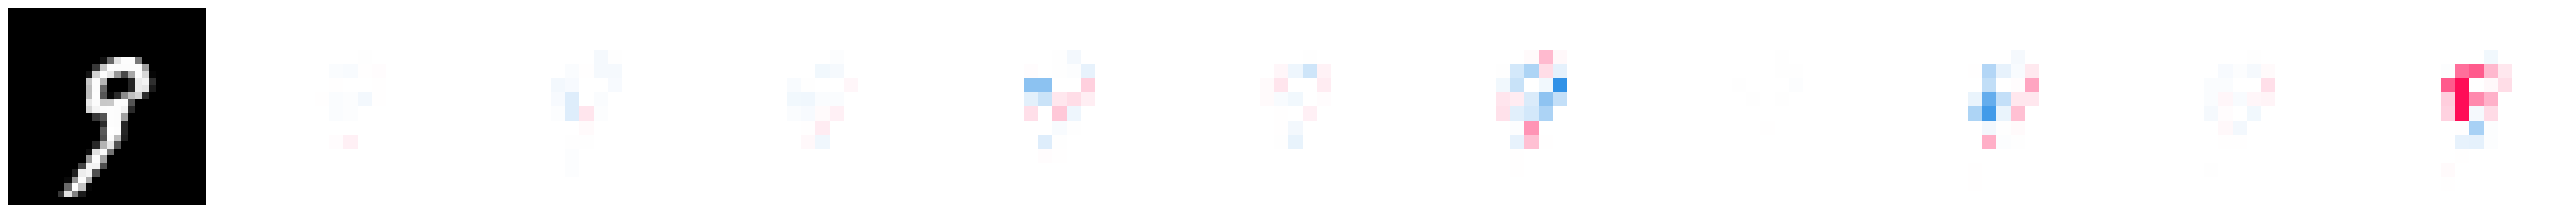

In [9]:
exp_result = np.array(exp_result, dtype=float)  # Convert to numeric type

plt.figure(figsize=(40, 10))
for i in range(11):
    plt.subplot(1, 11, i+1)
    if i == 0:
        plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray')
        plt.axis('off')
        continue
    else:
        plt.imshow(exp_result[0][i-1], cmap=red_transparent_blue, vmin=-np.nanpercentile(exp_result[0], 99.9),vmax=np.nanpercentile(exp_result[0], 99.9))
        plt.axis('off')